# **WHEAT DISEASE CLASSIFICATION**


> This project leverages deep learning techniques to classify and diagnose wheat plant diseases based on images. By utilizing Convolutional Neural Networks (CNNs), the model aims to provide an accurate and automated solution for disease detection, empowering farmers and agricultural experts with timely insights.

> **Objectives**:
1.   Develop an image classification model capable of identifying wheat plant diseases
2.   Evaluate the model’s performance using key metrics such as accuracy and F1-score.  
1.  Deploy the trained model as a web application














## **`EXPLORATORY DATA ANALYSIS`**

In [ ]:
!kaggle datasets download -d kushagra3204/wheat-plant-diseases

Dataset URL: https://www.kaggle.com/datasets/kushagra3204/wheat-plant-diseases
License(s): CC0-1.0
100% 6.09G/6.09G [05:03<00:00, 22.7MB/s]
100% 6.09G/6.09G [05:03<00:00, 21.6MB/s]


In [ ]:
!unzip wheat-plant-diseases.zip -d wheat_diseases


Streaming output truncated to the last 5000 lines.
  inflating: wheat_diseases/data/train/Septoria/septoria_1050.png  
  inflating: wheat_diseases/data/train/Septoria/septoria_1051.png  
  inflating: wheat_diseases/data/train/Septoria/septoria_1052.png  
  inflating: wheat_diseases/data/train/Septoria/septoria_1053.png  
  inflating: wheat_diseases/data/train/Septoria/septoria_1054.png  
  inflating: wheat_diseases/data/train/Septoria/septoria_1055.png  
  inflating: wheat_diseases/data/train/Septoria/septoria_1056.png  
  inflating: wheat_diseases/data/train/Septoria/septoria_1057.png  
  inflating: wheat_diseases/data/train/Septoria/septoria_1058.png  
  inflating: wheat_diseases/data/train/Septoria/septoria_1059.png  
  inflating: wheat_diseases/data/train/Septoria/septoria_106.png  
  inflating: wheat_diseases/data/train/Septoria/septoria_1060.png  
  inflating: wheat_diseases/data/train/Septoria/septoria_1061.png  
  inflating: wheat_diseases/data/train/Septoria/septoria_1062.png 

In [ ]:
import os
import shutil

# Paths to the original and filtered datasets
original_dataset_path = '/content/wheat_diseases/data'
filtered_dataset_path = '/content/filtered_data'

# Define the desired classes (as substrings in filenames)
desired_classes = ['aphid', 'mite', 'smut', 'septoria', 'mildew', 'healthy']

# Dataset partitions
partitions = ['train', 'test', 'valid']

# Function to filter dataset based on class substrings in filenames
def filter_dataset():
    for partition in partitions:
        partition_path = os.path.join(original_dataset_path, partition)
        filtered_partition_path = os.path.join(filtered_dataset_path, partition)

        # Create partition directory in the filtered dataset
        os.makedirs(filtered_partition_path, exist_ok=True)

        for class_name in desired_classes:
            filtered_class_path = os.path.join(filtered_partition_path, class_name.replace(' ', '_'))
            os.makedirs(filtered_class_path, exist_ok=True)

            # Search for files in the partition folder containing the class name as a substring
            for root, _, files in os.walk(partition_path):
                for file in files:
                    if class_name in file:
                        source_image_path = os.path.join(root, file)
                        destination_image_path = os.path.join(filtered_class_path, file)
                        shutil.copy(source_image_path, destination_image_path)

            print(f"Filtered files containing '{class_name}' in {partition}.")

# Run the filtering function
filter_dataset()

# Verify the new dataset
!ls /content/filtered_data/train
!ls /content/filtered_data/test
!ls /content/filtered_data/valid


Filtered files containing 'aphid' in train.
Filtered files containing 'mite' in train.
Filtered files containing 'smut' in train.
Filtered files containing 'septoria' in train.
Filtered files containing 'mildew' in train.
Filtered files containing 'healthy' in train.
Filtered files containing 'aphid' in test.
Filtered files containing 'mite' in test.
Filtered files containing 'smut' in test.
Filtered files containing 'septoria' in test.
Filtered files containing 'mildew' in test.
Filtered files containing 'healthy' in test.
Filtered files containing 'aphid' in valid.
Filtered files containing 'mite' in valid.
Filtered files containing 'smut' in valid.
Filtered files containing 'septoria' in valid.
Filtered files containing 'mildew' in valid.
Filtered files containing 'healthy' in valid.
aphid  healthy	mildew	mite  septoria	smut
aphid  healthy	mildew	mite  septoria	smut
aphid  healthy	mildew	mite  septoria	smut


In [ ]:
import os

#path to the filtered dataset
filtered_dir = '/content/drive/MyDrive/Technical assessment/filtered_dir'

# Check the structure for train, valid, and test
for split in ['filtered_train', 'filtered_valid', 'filtered_test']:
    print(f"Contents of {split} directory:")
    split_path = os.path.join(filtered_dir, split)

    if os.path.exists(split_path):
        # List classes within each split
        classes = os.listdir(split_path)
        print(f"  Classes in {split}: {classes}")

        # List class folders
        for cls in classes:
            cls_path = os.path.join(split_path, cls)
            if os.path.isdir(cls_path):
                print(f"    {cls} contains {len(os.listdir(cls_path))} files")
    else:
        print(f"{split} directory does not exist.")
    print('-' * 50)


Contents of filtered_train directory:
  Classes in filtered_train: ['mite', 'smut', 'aphid', 'septoria', 'mildew', 'healthy', '.ipynb_checkpoints']
    mite contains 2000 files
    smut contains 2000 files
    aphid contains 2000 files
    septoria contains 2000 files
    mildew contains 2000 files
    healthy contains 2000 files
    .ipynb_checkpoints contains 0 files
--------------------------------------------------
Contents of filtered_valid directory:
  Classes in filtered_valid: ['septoria', 'mildew', 'aphid', 'healthy', 'mite', 'smut', '.ipynb_checkpoints']
    septoria contains 20 files
    mildew contains 20 files
    aphid contains 20 files
    healthy contains 20 files
    mite contains 20 files
    smut contains 20 files
    .ipynb_checkpoints contains 0 files
--------------------------------------------------
Contents of filtered_test directory:
  Classes in filtered_test: ['mite', 'aphid', 'mildew', 'healthy', 'smut', 'septoria']
    mite contains 50 files
    aphid conta

In [ ]:
import os

# Path to the augmented_train directory
augmented_train_dir = '/content/drive/MyDrive/Technical assessment/filtered_data/augmented_train'

# Function to count images in each class
def count_images_in_directory(directory):
    total_images = 0
    class_counts = {}

    if os.path.exists(directory):
        for cls in os.listdir(directory):
            class_path = os.path.join(directory, cls)
            if os.path.isdir(class_path):
                num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
                class_counts[cls] = num_images
                total_images += num_images
    else:
        print(f"Directory {directory} does not exist.")

    return class_counts, total_images

# Get counts
class_counts, total_images = count_images_in_directory(augmented_train_dir)

# Display results
print("Class-wise image counts:")
for cls, count in class_counts.items():
    print(f"  {cls}: {count} images")
print(f"\nTotal images in augmented_train: {total_images}")


Class-wise image counts:
  mite: 2000 images
  smut: 2000 images
  aphid: 2000 images
  septoria: 2000 images
  mildew: 2000 images
  healthy: 2000 images
  .ipynb_checkpoints: 0 images

Total images in augmented_train: 12000


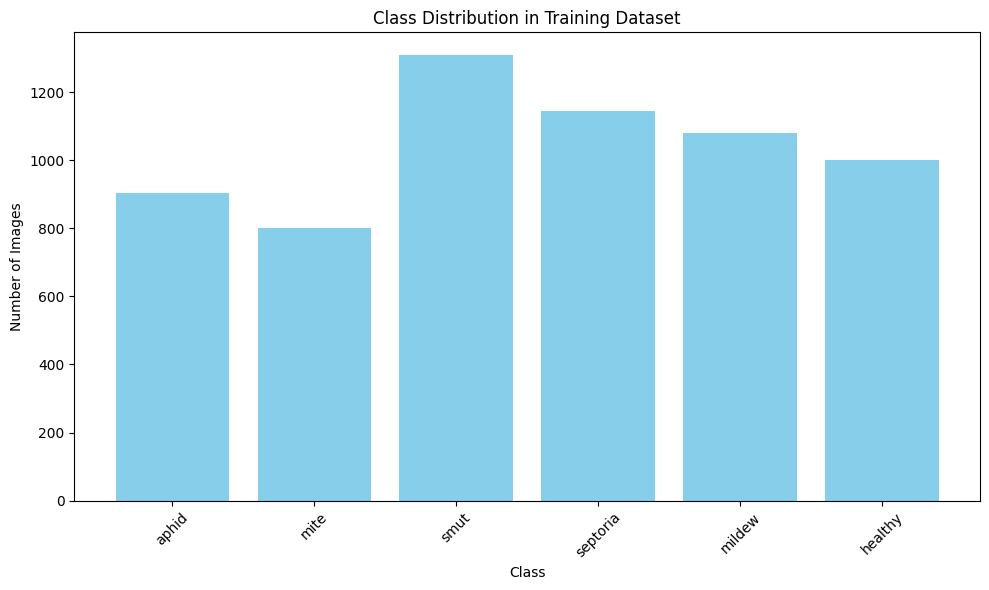

In [ ]:
import os
import matplotlib.pyplot as plt

#path to the training data
train_dir = '/content/drive/MyDrive/Technical assessment/filtered_data/train'

# List of class names
classes = ['aphid', 'mite', 'smut', 'septoria', 'mildew', 'healthy']

# Dictionary to hold the number of images in each class
class_counts = {}

# Iterate over each class and count the number of images in that class
for class_name in classes:
    class_path = os.path.join(train_dir, class_name)
    if os.path.exists(class_path):
        class_counts[class_name] = len(os.listdir(class_path))
    else:
        class_counts[class_name] = 0

# Plot the distribution as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Training Dataset')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


**Insights**

---


> **The dataset is slightly imbalanced, with some classes having significantly more images than others.**

> **Data augmentation techniques will be used to artificially increase the number of images for underrepresented classes.**












Processing aphid...
Processing mite...
Processing smut...
Processing septoria...


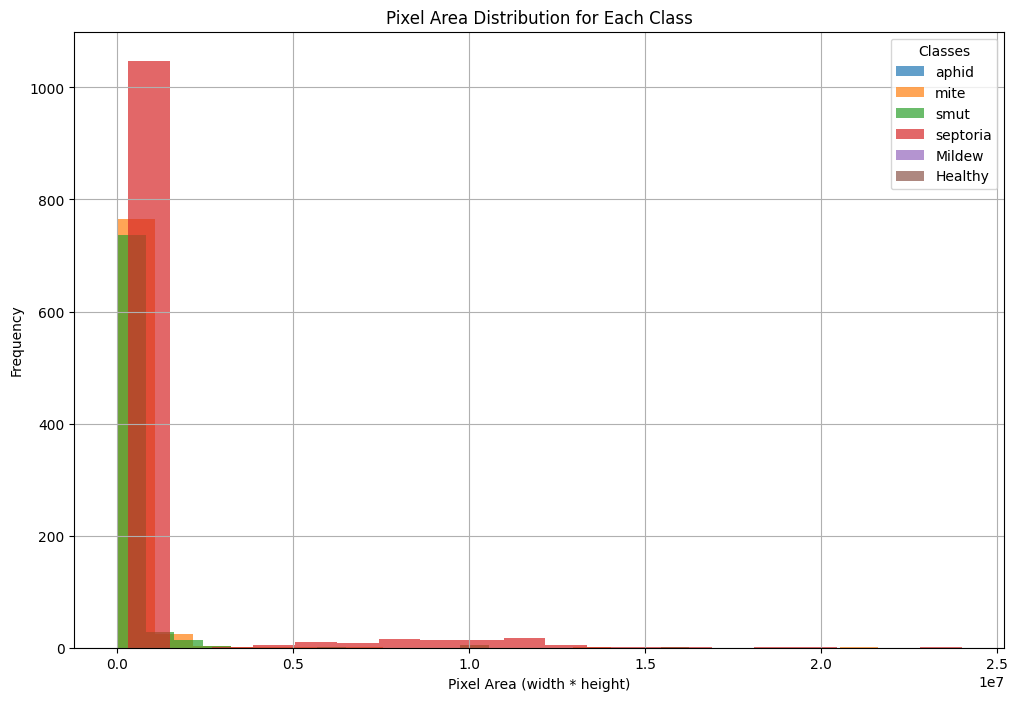

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# filtered data path
filtered_dir = '/content/drive/MyDrive/Technical assessment/filtered_data'

#Train folder and classes
train_dir = os.path.join(filtered_dir, 'train')
classes = ['aphid', 'mite', 'smut', 'septoria', 'Mildew', 'Healthy']

#dictionary to store image areas for each class
class_areas = {cls: [] for cls in classes}

#image dimensions for each class
for cls in classes:
    cls_path = os.path.join(train_dir, cls)

    # Check if the class path exists
    if os.path.exists(cls_path):
        print(f"Processing {cls}...")
        for image_file in os.listdir(cls_path):
            image_path = os.path.join(cls_path, image_file)

            try:
                img = Image.open(image_path)
                width, height = img.size
                image_area = width * height  # Calculate area (width * height)
                class_areas[cls].append(image_area)
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")

# Plotting histograms of image areas for each class
plt.figure(figsize=(12, 8))

for cls, areas in class_areas.items():
    plt.hist(areas, bins=20, alpha=0.7, label=cls)

plt.title('Pixel Area Distribution for Each Class')
plt.xlabel('Pixel Area (width * height)')
plt.ylabel('Frequency')
plt.legend(title='Classes')
plt.grid(True)
plt.show()


 **Insights**

---
> **The distribution is right-skewed, meaning there are more images with smaller pixel areas compared to larger pixel areas.**

 >**Standardizing the image sizes by resizing all images to a uniform width and height before feeding them into the model should be considered to address inconsistencyelps with image quality inconsistency.**


## PRE-PROCESSING

In [ ]:
from PIL import Image
import os

# Parameters
target_size = (224, 224)  # Target dimensions for resizing
base_dir = '/content/drive/MyDrive/Technical assessment/filtered_data'
splits = ['test', 'train', 'valid']  # Dataset splits
resized_dir = '/content/drive/MyDrive/Technical assessment/filtered_data/resized'

# Ensure the resized directory exists
os.makedirs(resized_dir, exist_ok=True)

for split in splits:
    split_path = os.path.join(base_dir, split)
    resized_split_path = os.path.join(resized_dir, split)
    os.makedirs(resized_split_path, exist_ok=True)

    if os.path.exists(split_path):
        classes = os.listdir(split_path)
        for cls in classes:
            class_path = os.path.join(split_path, cls)
            resized_class_path = os.path.join(resized_split_path, cls)  #
            os.makedirs(resized_class_path, exist_ok=True)

            if os.path.isdir(class_path):
                print(f"Processing class {cls} in {split}...")
                images = [img for img in os.listdir(class_path) if os.path.splitext(img)[1].lower() in {'.jpg', '.jpeg', '.png'}]
                for image_name in images:
                    image_path = os.path.join(class_path, image_name)
                    output_path = os.path.join(resized_class_path, image_name)
                    try:
                        # Skip already processed images
                        if os.path.exists(output_path):
                            print(f"File {image_name} already exists. Skipping...")
                            continue

                        # Open, verify, and resize the image
                        img = Image.open(image_path)
                        img.verify()  # Check for corruption
                        img = Image.open(image_path)
                        img = img.resize(target_size)

                        # Save resized image
                        img.save(output_path)
                        print(f"Resized and saved: {output_path}")
                    except Exception as e:
                        print(f"Error processing {image_name} in {cls} ({split}): {e}")
            else:
                print(f"{class_path} is not a directory.")
    else:
        print(f"Split directory {split_path} does not exist.")


Streaming output truncated to the last 5000 lines.
Resized and saved: /content/drive/MyDrive/Technical assessment/filtered_data/resized/train/smut/smut_81.png
Resized and saved: /content/drive/MyDrive/Technical assessment/filtered_data/resized/train/smut/smut_1216.png
Resized and saved: /content/drive/MyDrive/Technical assessment/filtered_data/resized/train/smut/smut_657.png
Resized and saved: /content/drive/MyDrive/Technical assessment/filtered_data/resized/train/smut/smut_696.png
Resized and saved: /content/drive/MyDrive/Technical assessment/filtered_data/resized/train/smut/smut_647.png
Resized and saved: /content/drive/MyDrive/Technical assessment/filtered_data/resized/train/smut/smut_522.png
Resized and saved: /content/drive/MyDrive/Technical assessment/filtered_data/resized/train/smut/smut_1036.png
Resized and saved: /content/drive/MyDrive/Technical assessment/filtered_data/resized/train/smut/smut_900.png
Resized and saved: /content/drive/MyDrive/Technical assessment/filtered_data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image
import numpy as np

# Define directories
resized_dir = '/content/drive/MyDrive/Technical assessment/filtered_data/resized'
normalized_dir = '/content/drive/MyDrive/Technical assessment/filtered_data/normalized'

# Ensure the normalized directory exists
os.makedirs(normalized_dir, exist_ok=True)

#normalize images for each split and class
def normalize_images(split):
    split_path = os.path.join(resized_dir, split)
    normalized_split_path = os.path.join(normalized_dir, split)
    os.makedirs(normalized_split_path, exist_ok=True)

    if os.path.exists(split_path):
        # Iterate through each class folder
        classes = os.listdir(split_path)
        for cls in classes:
            class_path = os.path.join(split_path, cls)
            normalized_class_path = os.path.join(normalized_split_path, cls)
            os.makedirs(normalized_class_path, exist_ok=True)

            if os.path.isdir(class_path):
                print(f"Normalizing class {cls} in {split}...")
                # Apply normalization to each image in the class folder
                for image_name in os.listdir(class_path):
                    image_path = os.path.join(class_path, image_name)
                    try:
                        # Load image with target size for consistency
                        img = Image.open(image_path)
                        print(f"Processing {image_path}, original size: {img.size}")

                        #consistent color mode
                        if img.mode != 'RGB':
                            img = img.convert('RGB')

                        # Resize and normalize
                        img = img.resize((224, 224))
                        img_array = np.array(img) / 255.0

                        # Debug normalized pixel values
                        print(f"Normalized range: {img_array.min()} - {img_array.max()}")

                        # Save the normalized image
                        img_normalized = Image.fromarray((img_array * 255).astype(np.uint8))
                        output_path = os.path.join(normalized_class_path, image_name)
                        img_normalized.save(output_path)
                        print(f"Saved normalized image to {output_path}")
                    except Exception as e:
                        print(f"Error normalizing {image_name} in {cls} ({split}): {e}")
            else:
                print(f"{class_path} is not a directory.")
    else:
        print(f"Split directory {split_path} does not exist.")

# Normalize images in each split (train, valid, test)
for split in ['train', 'valid', 'test']:
    normalize_images(split)


Streaming output truncated to the last 5000 lines.
Processing /content/drive/MyDrive/Technical assessment/filtered_data/resized/train/mildew/mildew_236.png, original size: (224, 224)
Normalized range: 0.0 - 0.9215686274509803
Saved normalized image to /content/drive/MyDrive/Technical assessment/filtered_data/normalized/train/mildew/mildew_236.png
Processing /content/drive/MyDrive/Technical assessment/filtered_data/resized/train/mildew/mildew_897.png, original size: (224, 224)
Normalized range: 0.0 - 0.996078431372549
Saved normalized image to /content/drive/MyDrive/Technical assessment/filtered_data/normalized/train/mildew/mildew_897.png
Processing /content/drive/MyDrive/Technical assessment/filtered_data/resized/train/mildew/mildew_619.png, original size: (224, 224)
Normalized range: 0.0 - 0.9607843137254902
Saved normalized image to /content/drive/MyDrive/Technical assessment/filtered_data/normalized/train/mildew/mildew_619.png
Processing /content/drive/MyDrive/Technical assessment/f

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from PIL import Image

# Paths
train_dir = '/content/drive/MyDrive/Technical assessment/filtered_data/normalized/train'
target_size = 1000  # Target number of images per class
save_dir = '/content/drive/MyDrive/Technical assessment/filtered_dir/filtered_train'

# Create directory for augmented data if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Process each class in the dataset
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    print(f"Processing class: {class_name}")

    # Count existing images in the class
    images = [img for img in os.listdir(class_path) if img.endswith('.jpg') or img.endswith('.png')]
    current_count = len(images)

    # Create save directory for the class
    class_save_path = os.path.join(save_dir, class_name)
    os.makedirs(class_save_path, exist_ok=True)

    # If the class already has the target size, move the existing images
    if current_count >= target_size:
        print(f"{class_name} already has {current_count} images. Moving existing images to save directory.")
        # Move the existing images to the save directory without augmentation
        for img_name in images:
            original_img_path = os.path.join(class_path, img_name)
            shutil.move(original_img_path, os.path.join(class_save_path, img_name))
        continue  # Skip augmentation for this class

    # If the class needs augmentation, calculate how many new images to generate
    augment_count = target_size - current_count
    print(f"Generating {augment_count} images for class {class_name}...")

    # Copy the existing images first to the augmented directory
    for img_name in images:
        original_img_path = os.path.join(class_path, img_name)
        img = Image.open(original_img_path)
        img.save(os.path.join(class_save_path, img_name))

    # Augment images to reach the target size
    for i, image_name in enumerate(images):
        image_path = os.path.join(class_path, image_name)

        try:
            # Open and preprocess image
            img = Image.open(image_path)
            img = img.resize((224, 224))
            img_array = np.array(img)
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

            # Generate augmented images
            augment_iter = datagen.flow(img_array, batch_size=1)
            for _ in range(min(augment_count, 10)):
                augmented_image = next(augment_iter)[0].astype('uint8')
                augmented_image = Image.fromarray(augmented_image)

                # Save augmented image
                save_name = f"{class_name}_aug_{i}_{_}.jpg"
                augmented_image.save(os.path.join(class_save_path, save_name))

                augment_count -= 1
                if augment_count <= 0:
                    break
        except Exception as e:
            print(f"Error processing {image_name}: {e}")

        if augment_count <= 0:
            break

    print(f"Completed processing for class: {class_name}")

print("Process complete!")


Processing class: mite
Generating 200 images for class mite...
Completed processing for class: mite
Processing class: smut
smut already has 1310 images. Moving existing images to save directory.
Processing class: aphid
Generating 97 images for class aphid...
Completed processing for class: aphid
Processing class: septoria
septoria already has 1144 images. Moving existing images to save directory.
Processing class: mildew
mildew already has 1081 images. Moving existing images to save directory.
Processing class: healthy
healthy already has 1000 images. Moving existing images to save directory.
Process complete!




> **Targeted augmentation has been applied on the train folder to achieve class balancing. A target factor of atleast 1000 images per class has been set, such that, augmentation has been done for the classes that have number of images below the target factor to meet the quota, and for those that have already achieved it, the class remains as is.**



In [ ]:
  import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

#directory paths
normalized_dir = '/content/drive/MyDrive/Technical assessment/filtered_data/normalized'

# List to store pixel values
pixel_values = []

# Function to collect pixel values for the histogram
def collect_pixel_values():
    # Iterate through train, valid, and test splits
    for split in ['train', 'valid', 'test']:
        split_path = os.path.join(normalized_dir, split)

        if os.path.exists(split_path):
            # Iterate through each class folder
            classes = os.listdir(split_path)
            for cls in classes:
                class_path = os.path.join(split_path, cls)
                if os.path.isdir(class_path):
                    for image_name in os.listdir(class_path):
                        image_path = os.path.join(class_path, image_name)
                        try:
                            # Open image and convert to numpy array
                            img = Image.open(image_path)
                            img_array = np.array(img) / 255.0  # Normalize to [0, 1]

                            # Add the pixel values to the list
                            pixel_values.extend(img_array.flatten())
                        except Exception as e:
                            print(f"Error processing {image_name} in {cls} ({split}): {e}")
        else:
            print(f"Split directory {split_path} does not exist.")

# Collect pixel values from all images
collect_pixel_values()

#Plot Histogram of Pixel Values (for normalization check) ---
plt.figure(figsize=(10, 6))
sns.histplot(pixel_values, kde=True, color="blue", bins=100)
plt.title("Histogram of Pixel Values (Normalized) Across All Images")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 1])
plt.grid(True)
plt.show()



> **The histogram appears to be relatively flat, suggesting that the normalization process has effectively distributed the pixel intensities across the entire range.**



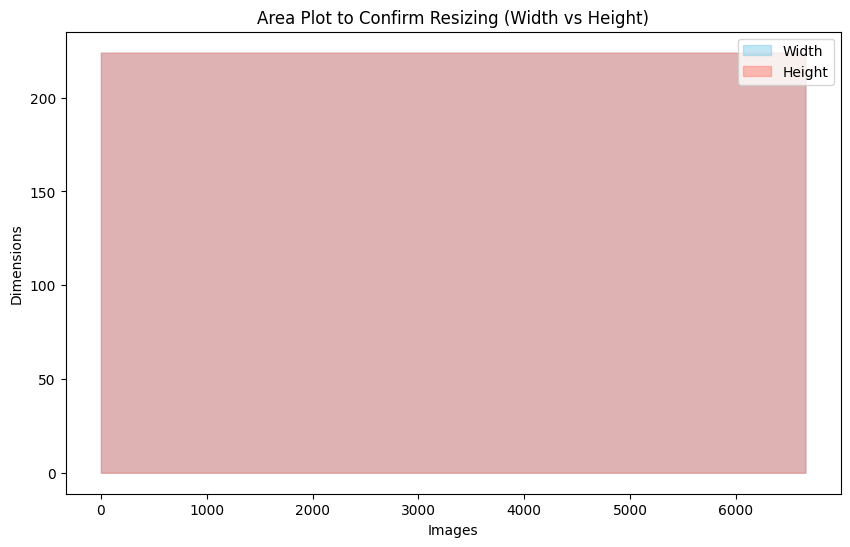

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define paths
resized_dir = '/content/drive/MyDrive/Technical assessment/filtered_data/resized'

# Lists to store width and height values
widths = []
heights = []

# Loop through the directories (train, valid, test)
for split in ['train', 'valid', 'test']:
    split_path = os.path.join(resized_dir, split)

    # Loop through each class
    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)

        # Loop through the images in each class folder
        for image_name in os.listdir(cls_path):
            image_path = os.path.join(cls_path, image_name)

            # Open the image
            try:
                img = Image.open(image_path)
                width, height = img.size
                widths.append(width)
                heights.append(height)
            except Exception as e:
                print(f"Error processing {image_name}: {e}")


plt.figure(figsize=(10, 6))

# Area plot for width and height
plt.fill_between(range(len(widths)), widths, color='skyblue', alpha=0.5, label='Width')
plt.fill_between(range(len(heights)), heights, color='salmon', alpha=0.5, label='Height')


plt.xlabel('Images')
plt.ylabel('Dimensions')
plt.title('Area Plot to Confirm Resizing (Width vs Height)')
plt.legend()

plt.show()




> **The plot shows that the width and height of the images have been resized to a consistent value.**



## **MODEL TRAINING & ANALYSIS**

In [5]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image size
img_size = 224  # Standard input size for MobileNetV2

# Define directories for train, validation, and test datasets
train_dir = '/content/drive/MyDrive/Technical assessment/filtered_dir/filtered_train'
valid_dir = '/content/drive/MyDrive/Technical assessment/filtered_dir/filtered_valid'
test_dir = '/content/drive/MyDrive/Technical assessment/filtered_dir/filtered_test'

# Define ImageDataGenerators for data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Only normalize the images
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)  # Only rescaling for validation and testing
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Flow data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical'
)

# Load the pre-trained MobileNetV2 model (without the top layer for transfer learning)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create the full model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer with softmax
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size
)

# Fine-tuning: Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Recompile the model with a smaller learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training the model (fine-tuning)
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,  # Fine-tune for a few more epochs
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the trained model
model.save('/content/drive/MyDrive/Technical assessment/filtered_dir/model_mobilenetv2_finetuned.h5')


Found 6535 images belonging to 6 classes.
Found 120 images belonging to 6 classes.
Found 300 images belonging to 6 classes.
Epoch 1/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 418s 4s/step - accuracy: 0.4904 - loss: 1.3269 - val_accuracy: 0.6458 - val_loss: 1.2861
Epoch 2/5
  1/102 ━━━━━━━━━━━━━━━━━━━━ 4:40 3s/step - accuracy: 0.8125 - loss: 0.5886

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8125 - loss: 0.5886 - val_accuracy: 0.7500 - val_loss: 1.0476
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 365s 4s/step - accuracy: 0.7907 - loss: 0.5687 - val_accuracy: 0.7396 - val_loss: 1.1840
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7812 - loss: 0.5392 - val_accuracy: 0.6667 - val_loss: 1.1383
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 396s 4s/step - accuracy: 0.8419 - loss: 0.4699 - val_accuracy: 0.7188 - val_loss: 1.0654
Epoch 1/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 407s 4s/step - accuracy: 0.7726 - loss: 0.6513 - val_accuracy: 0.6979 - val_loss: 1.1724
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8594 - loss: 0.4966 - val_accuracy: 0.7083 - val_loss: 0.8778
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 405s 4s/step - accuracy: 0.8324 - loss: 0.4985 - val_accuracy: 0.7188 - val_loss: 1.0805
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8906 - loss: 0.3047 - val_accuracy: 0.7083 - val

Test accuracy: 67.67%




>**The model is based on MobileNetV2, a pre-trained Convolutional Neural Network (CNN) that is fine-tuned for the specific dataset. The training process involved two phases: initial training with frozen base layers followed by fine-tuning some layers of the model. The goal of the model was to classify images into six classes.**


> **Training Accuracy:**

>**The model starts with a modest accuracy (49.04%) and improves significantly by the second epoch (81.25%), suggesting that MobileNetV2's pre-trained features helped the model learn relevant representations quickly.
After that, the training accuracy continues to improve, stabilizing around 84.19%. This indicates the model was effectively learning the patterns in the training data.**

>**Training Loss:**

>**The loss decreased steadily, which is expected as the model learns from the data. By the 5th epoch, the model has minimized the training error, suggesting good convergence.**

 **Model Performance During Fine-Tuning**

>**After freezing the layers in the initial training phase, fine-tuning was applied to improve model performance.**

**Fine-Tuning Accuracy:**


**Interpretation:**

>**Fine-tuning the model (unfreezing some layers of the base model) improved accuracy, reaching a peak of 89.06% in epoch 4.**

>**The model’s training accuracy fluctuated slightly in the final epochs (dropping to 84.86%), suggesting that the model may have reached a point of diminishing returns, where further fine-tuning didn’t yield significant improvements.**

>**Fine-Tuning Loss:**
>**The fine-tuning loss showed a consistent decline, indicating that the model was refining its parameters during the process. However, as the accuracy reached a plateau, the loss reduction also slowed down.**

**Validation Performance**
>**Validation accuracy was lower than training accuracy, with fluctuations throughout the epochs.**

>**A peak at 75.00% in epoch 2 suggests that the model was performing well on the validation set at that point but then showed some inconsistency in later epochs (dropping to 66.67% in epoch 4).**

>**This inconsistency could indicate that the model is overfitting to the training data and not generalizing well to the validation set.**

**Validation Loss:**
>**Validation loss fluctuated during the training process, showing higher values compared to the training loss. This reinforces the idea that the model may have learned features that are specific to the training set but not generalized well.**

**Test Set Evaluation**
>**The test accuracy of 67.67% is lower than both the training (84.19%) and validation (71.88%) accuracy, indicating that the model’s generalization capability to new, unseen data is relatively poor.**
>**

## **MODEL EVALUATION**

10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Accuracy: 0.1667
Precision (Macro): 0.1399
Recall (Macro): 0.1667
F1 Score (Macro): 0.1482


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


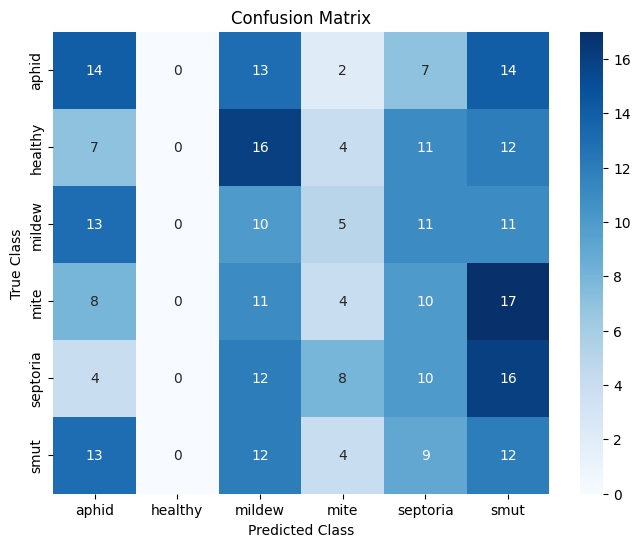

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# Convert the predictions to labels(for probability)
y_pred = np.argmax(model.predict(test_generator), axis=-1)

# Get true labels
y_true = test_generator.classes

# Compute Precision, Recall, F1-Score (Macro and Weighted)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


**1. Accuracy: 0.1667**

>**Interpretation: The accuracy is quite low, meaning that the model is correctly predicting only about 16.67% of the test samples. This is a very low accuracy for a multi-class classification task with 6 classes, indicating that the model is not learning meaningful patterns from the data.**

**2. Precision (Macro): 0.1399**

>**Interpretation: Precision measures how many of the positive predictions for each class were actually correct. A macro-average of 0.1399 suggests that the model's positive predictions across all classes are largely incorrect. This low precision indicates that, for many of the predictions, the model is not confident or accurate about which class the image belongs to.**

**3. Recall (Macro): 0.1667**

>**Interpretation: Recall measures how many of the actual positive instances for each class were correctly predicted. A macro-average of 0.1667 means the model is capturing only 16.67% of the true instances for each class on average, suggesting poor generalization to the actual class labels.**

**4. F1 Score (Macro): 0.1482**

>**Interpretation: The F1 score is a balanced measure between precision and recall. A 0.1482 indicates that the model is not performing well in terms of balancing precision and recall, and the model likely has difficulties identifying patterns in the data for each class.**


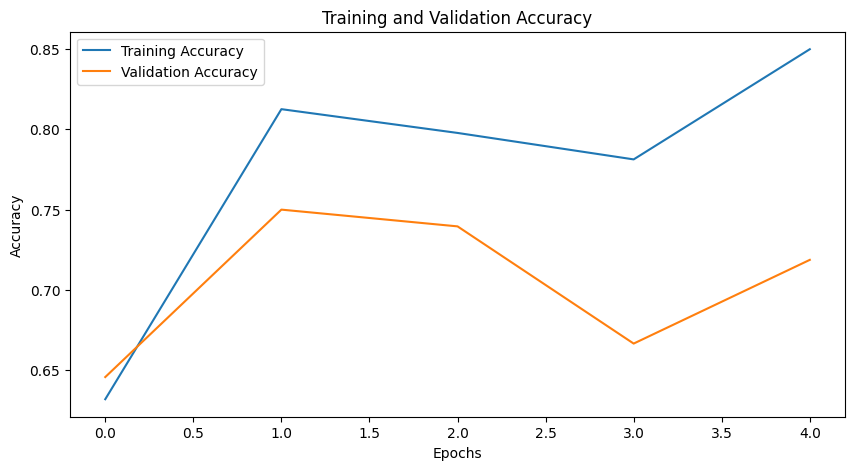

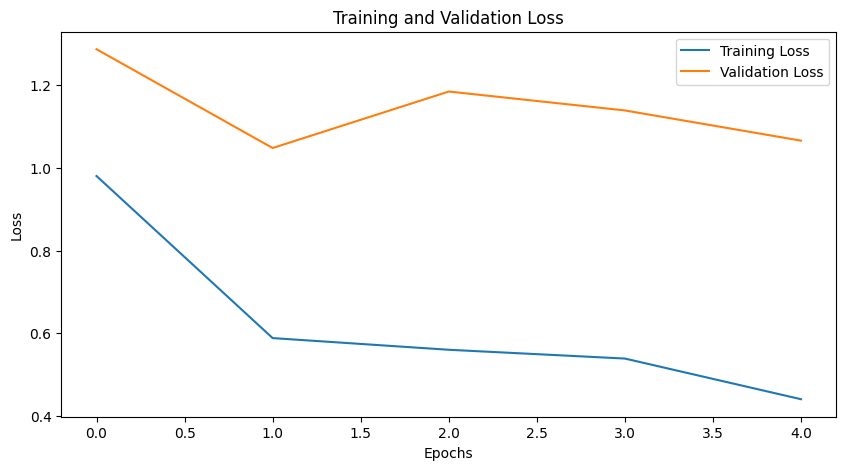

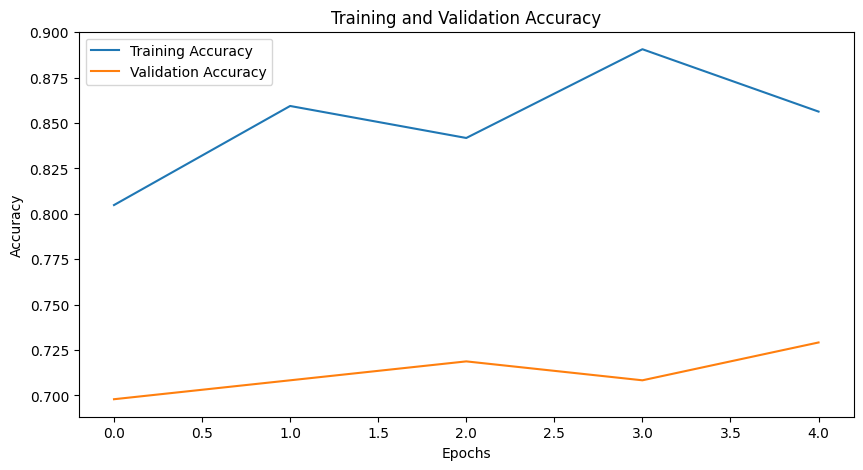

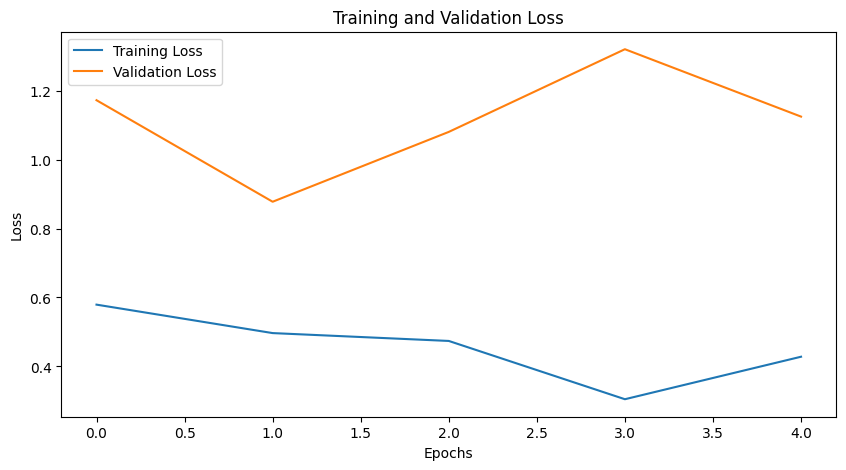

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
def plot_accuracy(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot training and validation loss
def plot_loss(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plotting after training phase
plot_accuracy(history)
plot_loss(history)

# Plotting after fine-tuning phase
plot_accuracy(history_finetune)
plot_loss(history_finetune)


## **Key Takeaway**
>**Overfitting: The model is likely overfitting because of the gap between training and validation performance. While the model's performance on the training set improves, it doesn't generalize well to the validation set.**